## Attribute in Klassen

In vielen anderen Programmiersprachen kann man den direkten Zugriff auf  Attibute eines Objektes verhindern, indem man das Attribut mit dem Schlüsselwort private schützt. Im UML-Diagramm werden diese Attribute mit einem Minus-Zeichen gekennzeichnet.

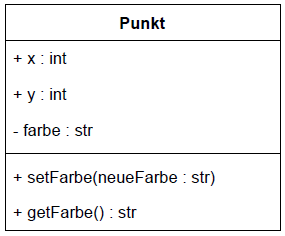

Solche Attribute können nur innerhalb der Klasse verwendet werden.
Für Python gibt es diesen Mechanismus nicht. Es gibt eine Vereinbarung, dass auf Attributte, deren Name mit einem Unterstrich beginnt, nicht direkt zugegriffen wird.

Mit passenden get und set Methoden, kann man die Werte der privaten Variablen verändern und lesen. Es kann aber so sicher gestellt werden, dass die Variable keine ungültigen Werte annimmt.


Beispiel:


In [2]:
class Punkt1():
    #Konstruktordefinition
    def __init__(self,x=0,y=0,farbe='black'):  
        #initialisieren von public Variablen
        self.x = x
        self.y = y
        # initialisieren einer private (internen) Variablen
        self.setFarbe(farbe)
    
    # Setter Methode für die Farbe: 
    # Der Name der Methode ist immer set + Attributname (1. Buchstabe groß ohne Unterstrich)
    def setFarbe(self,neueFarbe):
        #hier müsste noch eine genauere Prüfung stattfinden
        if neueFarbe != "" and isinstance(neueFarbe,str):
            self._farbe = neueFarbe
        else:
            self._farbe = "black"

    # Getter Methode für die Farbe: 
    # Name ist immer get + Attributname (ohne Unterstrich)
    def getFarbe(self):
        return self._farbe

In [3]:
p1 = Punkt1(3,4,345)

# Richtig:
p1.x = 2
p1.y = 3
p1.setFarbe("green")

#falsch! Die Farbe darf nicht direkt zugewiesen werden!!! Funktioniert aber
p1._farbe = 345

#Richtig
print(p1.getFarbe())

#Falsch: Funktioniert aber leider
print(p1._farbe)




345
345


### Property Attribute
Wenn man die Klasse um eine Property-Anweisung erweitert, kann man die Verwendung der Getter und Setter-Methoden für ein Attribut erzwingen:

Zum Beispiel:
`farbe = property(getFarbe,setFarbe)`

In der Klasse schaut das dann so aus:

In [4]:
class Punkt2():
    #Konstruktordefinition
    def __init__(self,x=0,y=0,farbe='black'):  
        #initialisieren von public Variablen
        self.x = x
        self.y = y
        # initialisieren einer private (internen) Variablen
        self._farbe = farbe
    
    # Setter Methode für die Farbe: 
    # Der Name der Methode ist immer set + Attributname (1. Buchstabe groß ohne Unterstrich)
    def setFarbe(self,neueFarbe):
        print("setFarbe wurde aufgerufen")
        #hier müsste noch eine genauere Prüfung stattfinden
        if neueFarbe != "" and isinstance(neueFarbe,str):
            self._farbe = neueFarbe
        else:
            self._farbe = "black"

    # Getter Methode für die Farbe: 
    # Name ist immer get + Attributname (ohne Unterstrich)
    def getFarbe(self):
        print("getFarbe wurde aufgerufen")
        return self._farbe
    
    # Neu: Property-Anweisung!!
    farbe = property(getFarbe,setFarbe)

Hier ein paar Testaufrufe:

In [5]:
p2 = Punkt2(1,3,'rot')
print(p2.farbe)


# Richtig:
p2.x = 2
p2.y = 3
p2.setFarbe("green")

#Jetzt wird automatisch der Setter aufgerufen:
p2.farbe = 45

#Richtig
print(p2.getFarbe())

#Jetzt wird automatisch der Getter aufgerufen
print(p2.farbe)


getFarbe wurde aufgerufen
rot
setFarbe wurde aufgerufen
setFarbe wurde aufgerufen
getFarbe wurde aufgerufen
black
getFarbe wurde aufgerufen
black


#### Aufgabe

Erstellen Sie eine Klasse Person, die Name, Vorname und Alter einer Person speichert. Alle Variablen sollen "private" sein. Erstellen Sie einen Konstruktor und passende Get- und Set- Methoden. Der Standardname soll JANE DOE sein, das Standardalter 0. Verhindern Sie ungültige Eingaben für alle 3 Attribute.

Erstellen Sie ein Testprogramm.

In [ ]:
class Person():
    #Konstruktor
    def __init__(self, name, vorname, alter):
        self.setName(name)
        self.setVorname(vorname)
        self.setAlter(alter)

    #Setter

    def setName(self, newName):
        if(newName != "" and isinstance(newName, str)):
            self.name = newName
        else:
            self.name = "DOE"
    def setVorname(self, newVorname):
        if newVorname != "" and isinstance(newVorname, str):
            self.vorname = newVorname
        else:
            self.vorname = "JANE"

    def setAlter(self, newAlter):
        if isinstance(newAlter, int) and newAlter >= 0:
            self.alter = newAlter

### Typisierung 

Python bestimmt den Datentyp einer Variablen immer selbst. Trotzdem kann man beim Programmieren dafür sorgen, dass nicht unbeabsichtigt falsche Typen verwendet werden. 
Die Typisierung wird vom Python-Interpreter ignoriert. Programme, die den Programmierstil prüfen (linter) melden beim Programmieren aber dann bei Typverletzungen Fehler.

Zur Typisierung gibt man nach der Definition eines Parameters, eines Attributs nach einem Doppelpunkt den gewünschten Datentyp an. 

Bei Funktionen gibt man den Typ des Rückgabewertes nach den Parameter-Klammern zwischen -> und einem Doppelpunkt an. Wenn die Funktion keinen Rückgabewert liefert wird als Typ None angegeben.

`def setFarbe(self,neueFarbe: str) -> int:`

#### Hinweis
Linting funktioniert in Jupyter Notebooks leider nicht zuverlässig.
Für normale Python-Programme ist eine Linting-Extension (z.B. Pylint und die passende Python-Bibliothek) und die Extension Error-Lens (blendet Fehlermeldungen in den Programmtext ein) sinnvoll.

Mit Hilfe der Tastenkombination CTRL-SHIFT-P und dem Kommando Python: Enable/Disable Linting kann das Linting ein- und ausgeschaltet werden.

Für die folgenden Beispiele wird trotzdem die Typisierung verwendet, um die Verständlichkeit der Klassen zu verbessern.

In [6]:
class Punkt3():

    #Konstruktordefinition
    def __init__(self,x : int =0,y : int =0,farbe : str ='black'):  
        #initialisieren von public Variablen
        self.x :int = x
        self.y :int = y
        # initialisieren einer private (internen) Variablen
        self.setFarbe(farbe)
    
    # Setter Methode für die Farbe: 
    # Der Name der Methode ist immer set + Attributname (1. Buchstabe groß ohne Unterstrich)
    def setFarbe(self,neueFarbe: str) -> int:
        #print("setFarbe wurde aufgerufen")
        #hier müsste noch eine genauere Prüfung stattfinden
        if neueFarbe != "" and isinstance(neueFarbe,str):
            self._farbe : str = neueFarbe
        else:
            self._farbe :str = "black"

    # Getter Methode für die Farbe: 
    # Name ist immer get + Attributname (ohne Unterstrich)
    def getFarbe (self) -> str:
        #print("getFarbe wurde aufgerufen")
        return self._farbe
    
    farbe = property(getFarbe,setFarbe)